# Cryptocurrency Market Predictor - Recurrent Neural Network

Predicting BTCUSD market

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
dataset = pd.read_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\BTC_Slopes.csv', nrows=15500)
dataset.tail(2)

,order_date_time,id,trade_px,future_px,aqsum,abqsum,bqsum,abqdt,aqsum3,abqdt^2,...,Spread,ratio5,ratio5dt,distRatio5,distRatio10,sign_vol,trade_volume,price_change,before price_change,god_mode
15498,2018-03-03 04:09:37,1.858778e+06,11307.995,11309.995,13.032159,-24.027984,37.060143,0.461419,1.584387,-0.649857,...,0.01,0.347098,-0.012236,2.43,2.43,-0.047855,0.183099,2.0,1,57774.251339
15499,2018-03-03 04:15:56,1.860400e+06,11309.995,11299.995,60.885185,31.916419,28.968766,3.605795,44.493875,-5.187522,...,0.01,0.910477,-0.004901,-0.93,-0.93,-0.031943,0.214564,-10.0,1,57774.251339


In [3]:
dataset_1sec = pd.read_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\BTC_Slopes_1sec.csv', nrows=600000)
dataset_1sec=dataset_1sec[-257000:]
dataset_1sec.head(2)

,order_date_time,Spread,trade_px,a1,b1,aq1,bq1,aqsum5,bqsum5,aqsum3,...,abqdt,abqdt^2,rollingRatio,ratio3,ratio5,ratio5dt,sign_vol,abqsum,diff,norepeat
343000,2018-03-03 06:25:51,0.01,11343.685,11343.69,11343.68,12.587137,0.479147,15.279366,1.385581,14.395432,...,-1.084282,-2.084282,0.954215,0.966326,0.916857,-0.012720,0.108060,29.617038,0.0,NaN
343001,2018-03-03 06:25:52,0.01,11343.685,11343.69,11343.68,12.587137,0.459147,15.279366,1.365581,14.395432,...,1.000000,-1.020000,0.955128,0.967625,0.917958,0.034796,0.110626,27.831554,0.0,NaN


In [4]:
dataset_1sec.tail(2)

,order_date_time,Spread,trade_px,a1,b1,aq1,bq1,aqsum5,bqsum5,aqsum3,...,abqdt,abqdt^2,rollingRatio,ratio3,ratio5,ratio5dt,sign_vol,abqsum,diff,norepeat
599998,2018-03-06 05:49:09,0.67,11307.535,11307.87,11307.20,0.022433,0.324,9.808412,3.035,9.797412,...,1.147000,1.162892,0.037286,0.764145,0.763692,0.088999,-0.008525,-17.342623,0.020,0.020
599999,2018-03-06 05:49:10,0.64,11307.550,11307.87,11307.23,0.024433,2.620,9.810412,2.645,9.799412,...,-0.015892,2.309892,0.037098,0.788151,0.787643,0.061492,0.017109,-18.891823,0.015,0.015


In [5]:
dataset_px = dataset.filter(['order_date_time','trade_px'], axis=1)
dataset_px.head(2)

,order_date_time,trade_px
0,2018-02-27 07:10:00,10301.005
1,2018-02-27 07:10:41,10311.275


In [6]:
#pd.to_datetime(odt.index).to_frame()
dataset_1sec_px = dataset_1sec.filter(['order_date_time','trade_px'], axis=1)
dataset_1sec_px.head(2)

,order_date_time,trade_px
343000,2018-03-03 06:25:51,11343.685
343001,2018-03-03 06:25:52,11343.685


#### Normalize

In [7]:

tdt=dataset.iloc[:, 0:2]
dataset = dataset.drop('order_date_time', 1)
dataset=dataset[['price_change','Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']]
dataset.head(2)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10
0,10.27,0.01,-1.681736,0.86312,0.464218,1.631992,0.463683,-0.50,-0.50
1,2.16,0.01,9.478009,0.77730,0.786469,0.026108,0.790011,3.58,3.58


In [8]:
dataset_1sec = dataset_1sec.drop('order_date_time', 1)
dataset_1sec=dataset_1sec[['diff','Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']]
dataset_1sec.head(2)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10
343000,0.0,0.01,13.893785,0.963329,0.916857,-1.084282,0.966326,4.78,4.78
343001,0.0,0.01,13.913785,0.964806,0.917958,1.000000,0.967625,4.78,4.78


In [9]:
price_changeRange=dataset["price_change"].max() - dataset["price_change"].min()
price_changeMean = dataset["price_change"].mean()
datasetNorm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())
datasetNorm["before price_change"]=0
datasetNorm.head(3)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before price_change
0,0.329746,-0.018424,-0.005004,0.383824,0.003524,0.016623,-0.018123,-0.004225,-0.004225,0
1,0.059413,-0.018424,0.034416,0.298003,0.325981,0.002669,0.308245,0.056220,0.056220,0
2,0.056746,-0.018424,-0.002139,0.276264,-0.014301,0.002459,-0.035642,0.018887,0.018887,0


In [10]:
diffRange=dataset_1sec["diff"].max() - dataset_1sec["diff"].min()
diffMean = dataset_1sec["diff"].mean()
dataset_1secNorm = (dataset_1sec - dataset_1sec.mean()) / (dataset_1sec.max() - dataset_1sec.min())
dataset_1secNorm["before diff"]=0
dataset_1secNorm.head(3)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before diff
343000,0.000002,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317,0
343001,0.000002,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317,0
343002,0.000002,-0.001231,0.045845,0.383379,0.359566,0.021504,0.390865,0.080651,0.080651,0


In [11]:
diffRange

59.880000000000003

## Hyperparams

In [12]:
num_epochs = 10

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 1 #The size of the sequence

state_size = 10#The number of neurons

num_features = 8
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 300

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 15500
The current configuration gives us 15500 batches of 1 observations each one looking 1 steps in the past


## Train-Test split

In [13]:
datasetTrain = datasetNorm[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(datasetNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(datasetNorm.index)-i
        break

datasetTest =  dataset_1secNorm

In [14]:
datasetTrain.head(2)

,price_change,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before price_change
0,0.329746,-0.018424,-0.005004,0.383824,0.003524,0.016623,-0.018123,-0.004225,-0.004225,0
1,0.059413,-0.018424,0.034416,0.298003,0.325981,0.002669,0.308245,0.056220,0.056220,0


In [15]:
datasetTest.head(2)

,diff,Spread,abq5,abratio,ratio5,abqdt,ratio3,distRatio5,distRatio10,before diff
343000,0.000002,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317,0
343001,0.000002,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317,0


In [16]:
#Pick appropriate columns to train
xTrain = datasetTrain[['Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']].as_matrix()
yTrain = datasetTrain['price_change'].as_matrix()
#, 'vol10','ratio10','ratio30', 'vol30'

In [17]:
print(xTrain[0:2],'\n',yTrain[0:2])

[[-0.01842438 -0.00500414  0.38382358  0.00352379  0.01662291 -0.01812307
  -0.00422458 -0.00422458]
 [-0.01842438  0.03441584  0.29800341  0.32598068  0.00266867  0.30824495
   0.05621986  0.05621986]] 
 [ 0.32974611  0.05941277]


In [18]:
#Pick appropriate columns to test
xTest = datasetTest[['Spread','abq5','abratio','ratio5','abqdt','ratio3','distRatio5','distRatio10']].as_matrix()
yTest = datasetTest['diff'].as_matrix()
#,'vol10','ratio10','ratio30', 'vol30'

In [19]:
print(xTest[0:2],'\n',yTest[0:2])

[[-0.00123131  0.05371815  0.46994191  0.42920034 -0.01154364  0.46996274
   0.08831671  0.08831671]
 [-0.00123131  0.05379688  0.47141869  0.43030267  0.01064536  0.47126202
   0.08831671  0.08831671]] 
 [  2.34788708e-06   2.34788708e-06]


## Visualize starting price data

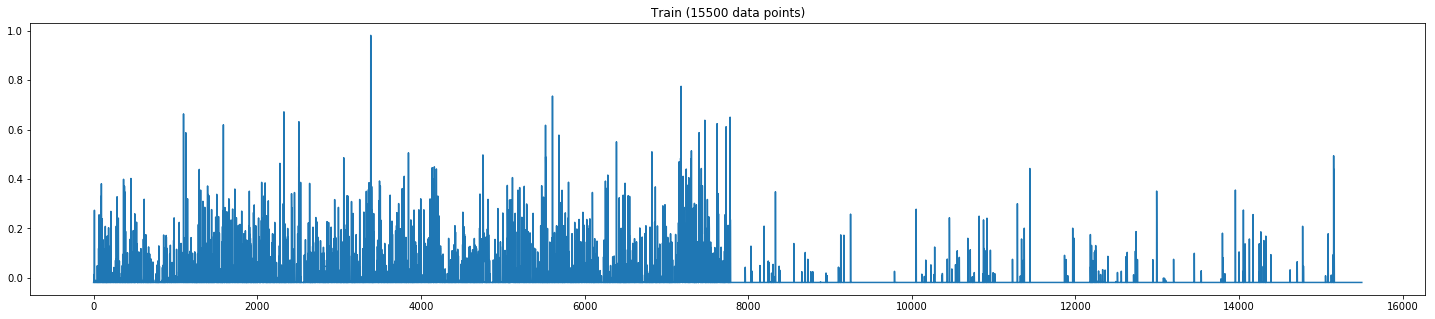

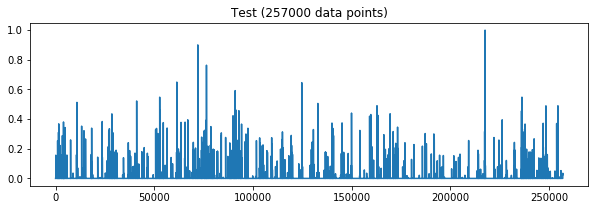

In [20]:
plt.figure(figsize=(25,5))
plt.plot(xTrain[:,0])
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(xTest[:,0])
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

## Placeholders

In [21]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

## Weights and biases
Because is a 3 layer net:
1. Input
2. Hidden Recurrent layer
3. Output

We need 2 pairs of W and b

In [22]:
W2 = tf.Variable(initial_value=np.random.rand(state_size,num_classes),dtype=tf.float32)
b2 = tf.Variable(initial_value=np.random.rand(1,num_classes),dtype=tf.float32)

Unpack

In [23]:
labels_series = tf.unstack(batchY_placeholder, axis=1)

## Forward pass - Unroll the cell

Input to recurrent

In [24]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)

states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

In [25]:
states_series = tf.transpose(states_series,[1,0,2])

## Backward pass - Output

In [26]:
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

## Weights and bias out

In [27]:
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))

## Prediction, Loss & Optimizer

In [28]:
prediction = tf.matmul(last_state,weight) + bias
prediction

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [29]:
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

C:\Users\Jason\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [30]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    for epoch_idx in range(num_epochs):
                
        print('Epoch %d' %epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            
            batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
            batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
                
            #print('IDXs',start_idx,end_idx)
            #print('X',batchX.shape,batchX)
            #print('Y',batchX.shape,batchY)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            #TRAIN!
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
           
            
            if(batch_idx % 200 == 0):
                print('Step %d - Loss: %.6f' %(batch_idx,_loss))
                
    #TEST
    
    
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        
        #_current_state = np.zeros((batch_size,state_size))
        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        #Test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        test_pred_list.append(test_pred[-1][0]) #The last one

Epoch 0
Step 0 - Loss: 0.177729
Step 200 - Loss: 0.000043
Step 400 - Loss: 0.006422
Step 600 - Loss: 0.026119
Step 800 - Loss: 0.000908
Step 1000 - Loss: 0.143355
Step 1200 - Loss: 0.008435
Step 1400 - Loss: 0.016805
Step 1600 - Loss: 0.111460
Step 1800 - Loss: 0.002572
Step 2000 - Loss: 0.004197
Step 2200 - Loss: 0.001735
Step 2400 - Loss: 0.005170
Step 2600 - Loss: 0.012205
Step 2800 - Loss: 0.113167
Step 3000 - Loss: 0.062683
Step 3200 - Loss: 0.015355
Step 3400 - Loss: 0.041779
Step 3600 - Loss: 0.097804
Step 3800 - Loss: 0.004653
Step 4000 - Loss: 0.007549
Step 4200 - Loss: 0.027691
Step 4400 - Loss: 0.008890
Step 4600 - Loss: 0.001618
Step 4800 - Loss: 0.012279
Step 5000 - Loss: 0.099293
Step 5200 - Loss: 0.020535
Step 5400 - Loss: 0.011526
Step 5600 - Loss: 0.001768
Step 5800 - Loss: 0.141794
Step 6000 - Loss: 0.006668
Step 6200 - Loss: 0.047547
Step 6400 - Loss: 0.201710
Step 6600 - Loss: 0.002366
Step 6800 - Loss: 0.008478
Step 7000 - Loss: 0.009792
Step 7200 - Loss: 0.055736


Step 13400 - Loss: 0.003048
Step 13600 - Loss: 0.002681
Step 13800 - Loss: 0.001648
Step 14000 - Loss: 0.003853
Step 14200 - Loss: 0.008402
Step 14400 - Loss: 0.195495
Step 14600 - Loss: 0.002443
Step 14800 - Loss: 0.000002
Step 15000 - Loss: 0.002964
Step 15200 - Loss: 0.000515
Step 15400 - Loss: 0.000733
Epoch 4
Step 0 - Loss: 0.128028
Step 200 - Loss: 0.000146
Step 400 - Loss: 0.001854
Step 600 - Loss: 0.019014
Step 800 - Loss: 0.005193
Step 1000 - Loss: 0.157140
Step 1200 - Loss: 0.002990
Step 1400 - Loss: 0.012682
Step 1600 - Loss: 0.098519
Step 1800 - Loss: 0.003274
Step 2000 - Loss: 0.001248
Step 2200 - Loss: 0.007242
Step 2400 - Loss: 0.000530
Step 2600 - Loss: 0.006553
Step 2800 - Loss: 0.124502
Step 3000 - Loss: 0.052726
Step 3200 - Loss: 0.011287
Step 3400 - Loss: 0.030842
Step 3600 - Loss: 0.112921
Step 3800 - Loss: 0.001089
Step 4000 - Loss: 0.004484
Step 4200 - Loss: 0.020829
Step 4400 - Loss: 0.003973
Step 4600 - Loss: 0.001580
Step 4800 - Loss: 0.012615
Step 5000 - Loss

Step 11000 - Loss: 0.020604
Step 11200 - Loss: 0.014654
Step 11400 - Loss: 0.000864
Step 11600 - Loss: 0.020880
Step 11800 - Loss: 0.012954
Step 12000 - Loss: 0.009723
Step 12200 - Loss: 0.001087
Step 12400 - Loss: 0.019037
Step 12600 - Loss: 0.000723
Step 12800 - Loss: 0.108932
Step 13000 - Loss: 0.003436
Step 13200 - Loss: 0.000418
Step 13400 - Loss: 0.001905
Step 13600 - Loss: 0.006188
Step 13800 - Loss: 0.000729
Step 14000 - Loss: 0.004571
Step 14200 - Loss: 0.007268
Step 14400 - Loss: 0.192222
Step 14600 - Loss: 0.004769
Step 14800 - Loss: 0.000017
Step 15000 - Loss: 0.003990
Step 15200 - Loss: 0.000722
Step 15400 - Loss: 0.001465
Epoch 8
Step 0 - Loss: 0.121981
Step 200 - Loss: 0.000014
Step 400 - Loss: 0.002718
Step 600 - Loss: 0.017402
Step 800 - Loss: 0.007929
Step 1000 - Loss: 0.168843
Step 1200 - Loss: 0.002350
Step 1400 - Loss: 0.013711
Step 1600 - Loss: 0.090230
Step 1800 - Loss: 0.004281
Step 2000 - Loss: 0.000391
Step 2200 - Loss: 0.010233
Step 2400 - Loss: 0.000003
Step

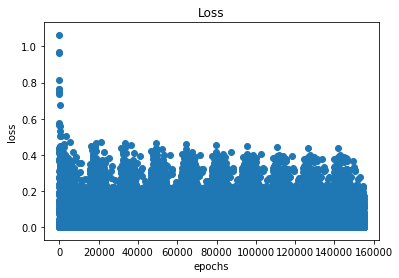

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)),y=loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

#### Denormalize

In [32]:
Price = pd.DataFrame(xTest)
Price.head(10)

,0,1,2,3,4,5,6,7
0,-0.001231,0.053718,0.469942,0.429200,-0.011544,0.469963,0.088317,0.088317
1,-0.001231,0.053797,0.471419,0.430303,0.010645,0.471262,0.088317,0.088317
2,-0.001231,0.045845,0.383379,0.359566,0.021504,0.390865,0.080651,0.080651
3,-0.001231,0.037894,0.295340,0.292687,0.010752,0.315342,0.072985,0.072985
4,-0.001231,0.037739,0.295340,0.292194,-0.026238,0.314872,0.072985,0.072985
5,-0.001231,0.057141,0.460632,0.424852,-0.024295,0.461367,0.088317,0.088317
6,-0.001231,0.055705,0.466237,0.427772,0.003886,0.466260,0.088317,0.088317
7,-0.001231,0.054268,0.471843,0.430888,0.008491,0.471520,0.088317,0.088317
8,-0.001231,0.048163,0.467861,0.405973,0.013097,0.446677,0.078411,0.078411
9,-0.001231,0.042057,0.463880,0.378026,0.006788,0.418405,0.068506,0.068506


In [33]:
test_pred_list[:] = [(x*diffRange)+diffMean for x in test_pred_list]
xTest[:] = [(x*diffRange)+diffMean for x in xTest]
yTest[:] = [(y*diffRange)+diffMean for y in yTest]

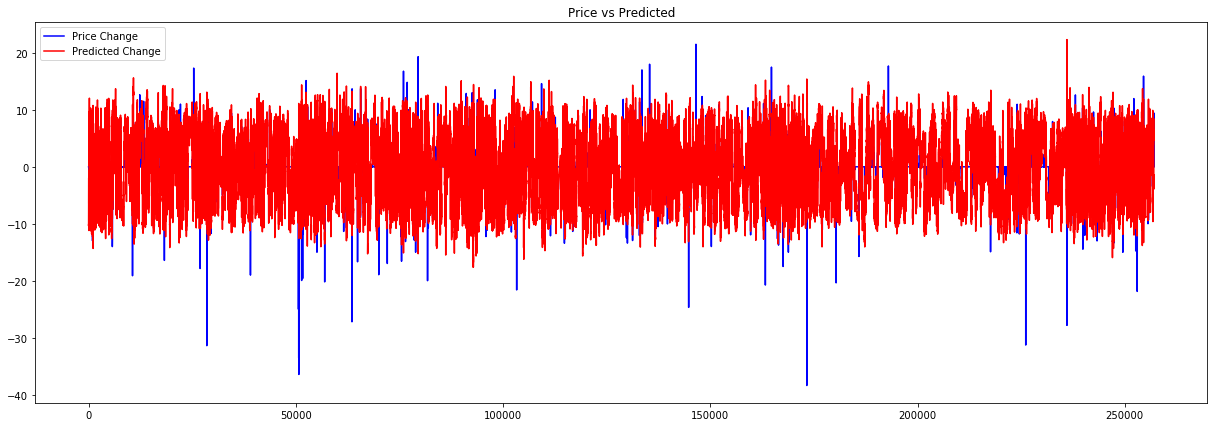

In [34]:
from scipy.ndimage.interpolation import shift
predicted=shift(test_pred_list, -5, cval=0)
plt.figure(figsize=(21,7))
plt.plot(yTest,label='Price Change',color='blue')
#plt.plot(xTest[:,0],label='Baseline')
plt.plot(test_pred_list,label='Predicted Change',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [35]:
len(test_pred_list)

256999

In [36]:
pd.DataFrame(test_pred_list, columns=['Prediction']).tail()

,Prediction
256994,-3.595836
256995,-3.026275
256996,-1.961726
256997,-3.909893
256998,-1.397035


In [37]:
predict= pd.DataFrame(test_pred_list, columns=['Prediction'])
Target = pd.DataFrame(yTest, columns=['Target'])
Price = pd.DataFrame(xTest[:,0], columns=['Price'])
realVSpredict = predict.join(Target)
realVSpredict = realVSpredict.join(Price)
with pd.option_context('display.max_rows', None, 'display.max_columns', 4):
    print(realVSpredict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(realVSpredict['Prediction'],realVSpredict['Target'])
print("r-squared:", r_value**2)

r-squared: 0.00228630463059


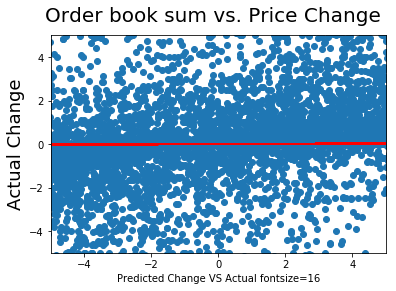

In [39]:

plt.scatter (realVSpredict['Prediction'],realVSpredict['Target'])
plt.suptitle('Order book sum vs. Price Change', fontsize=20)
plt.plot(realVSpredict['Prediction'], intercept + slope*(realVSpredict['Prediction']), 'r', label='fitted line')
plt.ylabel('Actual Change', fontsize=18)
plt.ylim( (-5, 5) )
plt.xlim(-5, 5)
plt.xlabel('Predicted Change VS Actual fontsize=16')
plt.show()

In [40]:
PriceChange = pd.DataFrame(xTest[:,0])
PriceChange.head(10)

,0
0,-0.073871
1,-0.073871
2,-0.073871
3,-0.073871
4,-0.073871
5,-0.073871
6,-0.073871
7,-0.073871
8,-0.073871
9,-0.073871


In [41]:
tdt[-3:]

,order_date_time,id
15497,2018-03-03 04:09:33,1.858748e+06
15498,2018-03-03 04:09:37,1.858778e+06
15499,2018-03-03 04:15:56,1.860400e+06


In [42]:
length=len(PriceChange.index)
length

257000

In [43]:

#pd.to_datetime(tdt,format='%Y%m%d %H:%M:%S.%f')

In [44]:
dataset_1sec_px=dataset_1sec_px[-length:]
#backtrader_data= tdt[-length:]

tdt=dataset_1sec_px['order_date_time']
Open=dataset_1sec_px['trade_px']
High= dataset_1sec_px['trade_px']
Low= dataset_1sec_px['trade_px']
Close= dataset_1sec_px['trade_px']
#Rnn10= ds.join(Price)

backtrader_data = pd.concat([tdt,Open, High, Low, Close], axis=1)
#date_time=pd.to_datetime(backtrader_data.trades_date_time, format="%Y%m%d %H:%M:%S.%f").to_frame()
#backtrader_data = backtrader_data.drop(backtrader_data.index[range(0,5)])
backtrader_data.tail(20)


,order_date_time,trade_px,trade_px,trade_px,trade_px
599980,2018-03-06 05:48:51,11297.9950,11297.9950,11297.9950,11297.9950
599981,2018-03-06 05:48:52,11297.9950,11297.9950,11297.9950,11297.9950
599982,2018-03-06 05:48:53,11297.9950,11297.9950,11297.9950,11297.9950
599983,2018-03-06 05:48:54,11297.9950,11297.9950,11297.9950,11297.9950
599984,2018-03-06 05:48:55,11297.9950,11297.9950,11297.9950,11297.9950
599985,2018-03-06 05:48:56,11297.9950,11297.9950,11297.9950,11297.9950
599986,2018-03-06 05:48:57,11297.9950,11297.9950,11297.9950,11297.9950
599987,2018-03-06 05:48:58,11297.9950,11297.9950,11297.9950,11297.9950
599988,2018-03-06 05:48:59,11297.9950,11297.9950,11297.9950,11297.9950
599989,2018-03-06 05:49:00,11297.9950,11297.9950,11297.9950,11297.9950


In [45]:
backtrader_data = backtrader_data.reset_index(drop=True)
backtrader_data=backtrader_data.join(predict)
#backtrader_data['RNN']=backtrader_data['Prediction']+backtrader_data.iloc[:, [1]]
backtrader_data.head()

,order_date_time,trade_px,trade_px,trade_px,trade_px,Prediction
0,2018-03-03 06:25:51,11343.685,11343.685,11343.685,11343.685,-10.150210
1,2018-03-03 06:25:52,11343.685,11343.685,11343.685,11343.685,-10.383155
2,2018-03-03 06:25:53,11343.685,11343.685,11343.685,11343.685,-9.141348
3,2018-03-03 06:25:54,11343.685,11343.685,11343.685,11343.685,-7.689695
4,2018-03-03 06:25:55,11343.685,11343.685,11343.685,11343.685,-7.287557


In [46]:
backtrader_data = backtrader_data[:-1]
backtrader_data.tail()

,order_date_time,trade_px,trade_px,trade_px,trade_px,Prediction
256994,2018-03-06 05:49:05,11307.4400,11307.4400,11307.4400,11307.4400,-3.595836
256995,2018-03-06 05:49:06,11307.4675,11307.4675,11307.4675,11307.4675,-3.026275
256996,2018-03-06 05:49:07,11307.4950,11307.4950,11307.4950,11307.4950,-1.961726
256997,2018-03-06 05:49:08,11307.5150,11307.5150,11307.5150,11307.5150,-3.909893
256998,2018-03-06 05:49:09,11307.5350,11307.5350,11307.5350,11307.5350,-1.397035


In [47]:
backtrader_data['RNN']=backtrader_data['Prediction']+backtrader_data.iloc[:, 1]

In [48]:

backtrader_data = backtrader_data.set_index(pd.DatetimeIndex(backtrader_data['order_date_time']))
backtrader_data= backtrader_data.drop('order_date_time', axis=1)
backtrader_data= backtrader_data.drop('Prediction', axis=1)

# For resampling.  Needs work.

In [49]:


#backtrader_data = backtrader_data.resample('s').mean()

#backtrader_data[['Prediction']]=backtrader_data[['Prediction']].fillna(value=0)
#backtrader_data=backtrader_data.fillna(method='bfill')
backtrader_data.head(30)

,trade_px,trade_px,trade_px,trade_px,RNN
order_date_time,,,,,
2018-03-03 06:25:51,11343.685,11343.685,11343.685,11343.685,11333.534790
2018-03-03 06:25:52,11343.685,11343.685,11343.685,11343.685,11333.301845
2018-03-03 06:25:53,11343.685,11343.685,11343.685,11343.685,11334.543652
2018-03-03 06:25:54,11343.685,11343.685,11343.685,11343.685,11335.995305
2018-03-03 06:25:55,11343.685,11343.685,11343.685,11343.685,11336.397443
2018-03-03 06:25:56,11343.685,11343.685,11343.685,11343.685,11333.710933
2018-03-03 06:25:57,11343.685,11343.685,11343.685,11343.685,11333.396940
2018-03-03 06:25:58,11343.685,11343.685,11343.685,11343.685,11333.311653
2018-03-03 06:25:59,11343.685,11343.685,11343.685,11343.685,11333.916832


In [52]:
backtrader_data.to_csv('BTCUSD_RNN10.csv',index=True)

In [51]:
backtrader_data.index

DatetimeIndex(['2018-03-03 06:25:51', '2018-03-03 06:25:52',
               '2018-03-03 06:25:53', '2018-03-03 06:25:54',
               '2018-03-03 06:25:55', '2018-03-03 06:25:56',
               '2018-03-03 06:25:57', '2018-03-03 06:25:58',
               '2018-03-03 06:25:59', '2018-03-03 06:26:00',
               ...
               '2018-03-06 05:49:00', '2018-03-06 05:49:01',
               '2018-03-06 05:49:02', '2018-03-06 05:49:03',
               '2018-03-06 05:49:04', '2018-03-06 05:49:05',
               '2018-03-06 05:49:06', '2018-03-06 05:49:07',
               '2018-03-06 05:49:08', '2018-03-06 05:49:09'],
              dtype='datetime64[ns]', name='order_date_time', length=256999, freq=None)

## 